# Biblioteki

In [1]:
import os
import mne
import numpy as np
from scipy.signal import butter, filtfilt
from scipy import signal, misc
import matplotlib.pyplot as plt

# Ładowanie danych z pliku

In [2]:
PATH_KONTROLA = "C:/Users/kuba_/Desktop/Studia/semestr7/eeg/project/pacjenci/"

if(os.path.exists(PATH_KONTROLA)):
    file_names = os.listdir(PATH_KONTROLA)
    kontrola_bdf_paths = [PATH_KONTROLA + str(file_name) for file_name in file_names]
    
print("Katalog kontroli zawiera ", len(kontrola_bdf_paths), " plików")

Katalog kontroli zawiera  32  plików


In [3]:
VS = ['pcf01_03.bdf', 'pcf02_02.bdf', 'pcf04_02.bdf', 'pcf05_02.bdf', 'pcf06_02.bdf', 'pcf07_02.bdf', 'pcf09_02.bdf',
      'pcf12_02.bdf', 'pcf14_02.bdf', 'pcf16_02.bdf', 'pcf17_02.bdf', 'pcf20_01.bdf', 'pcf21_01.bdf', 'pcf21_02.bdf',
      'pcf22_01.bdf', 'pcf23_01.bdf', 'pcf24_01.bdf', 'pcf25_01.bdf', 'pcf26_01.bdf', 'pcf27_01.bdf', 'pcf28_01.bdf']

MCS = ['pcf01_02.bdf', 'pcf02_03.bdf', 'pcf05_03.bdf', 'pcf06_03.bdf', 'pcf07_03.bdf', 'pcf09_03.bdf', 'pcf25_02.bdf',
       'pcf29_01.bdf', 'pcf30_01.bdf', 'pcf31_01.bdf']

EMCS = ['pcf26_02.bdf']

print("Obie skale")
print(len(VS))
print(len(MCS))
print(len(EMCS))

Obie skale
21
10
1


In [4]:
VS = ['pcf01_02.bdf', 'pcf01_03.bdf', 'pcf04_02.bdf', 'pcf12_02.bdf', 'pcf14_02.bdf', 'pcf16_02.bdf', 'pcf17_02.bdf', 
      'pcf20_01.bdf', 'pcf21_01.bdf', 'pcf21_02.bdf', 'pcf22_01.bdf', 'pcf23_01.bdf', 'pcf24_01.bdf', 'pcf26_01.bdf', 
      'pcf27_01.bdf', 'pcf28_01.bdf']

MCS = ['pcf02_02.bdf', 'pcf02_03.bdf', 'pcf05_02.bdf', 'pcf05_03.bdf', 'pcf06_02.bdf', 'pcf06_03.bdf', 'pcf07_02.bdf',
       'pcf07_03.bdf', 'pcf09_02.bdf', 'pcf09_03.bdf', 'pcf25_01.bdf', 'pcf25_02.bdf', 'pcf29_01.bdf', 'pcf30_01.bdf', 
       'pcf31_01.bdf']

EMCS = ['pcf26_02.bdf']

print("Wieksza waga dla CRS-R")
print(len(VS))
print(len(MCS))
print(len(EMCS))
print("Do usunięcia:", MCS[-10], " - Brak poprawnych triggerow!")

Wieksza waga dla CRS-R
16
15
1
Do usunięcia: pcf06_03.bdf  - Brak poprawnych triggerow!


In [5]:
VS_raw_files = []
MCS_raw_files = []

for path in kontrola_bdf_paths:
    if path[-12:] in VS:
        raw = mne.io.read_raw_bdf(path)
        VS_raw_files.append(raw)
    if path[-12:] in MCS and path[-12:] != 'pcf06_03.bdf':
        print(path[-12:])
        raw = mne.io.read_raw_bdf(path)
        MCS_raw_files.append(raw)
        
print("\n\n")
print(len(VS_raw_files))
print(len(MCS_raw_files))
print(raw.info)

Extracting EDF parameters from C:\Users\kuba_\Desktop\Studia\semestr7\eeg\project\pacjenci\pcf01_02.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from C:\Users\kuba_\Desktop\Studia\semestr7\eeg\project\pacjenci\pcf01_03.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
pcf02_02.bdf
Extracting EDF parameters from C:\Users\kuba_\Desktop\Studia\semestr7\eeg\project\pacjenci\pcf02_02.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
pcf02_03.bdf
Extracting EDF parameters from C:\Users\kuba_\Desktop\Studia\semestr7\eeg\project\pacjenci\pcf02_03.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from C:\Users\kuba_\Desktop\Studia\semestr7\eeg\project\pacjenci\pcf04_02.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
pcf05_02.bdf
Extracting 

###### Wczytanie eventow i czestotliwosci probkowania.

In [6]:
VS_events = []
VS_sampling_freq_all = []

MCS_events = []
MCS_sampling_freq_all = []

for count, raw in enumerate(VS_raw_files):
    VS_sampling_freq_all.append(raw.info['sfreq'])
    VS_events.append(mne.find_events(raw, stim_channel='Status', initial_event=True))
    VS_events[count][:, 0] = VS_events[count][:, 0] * VS_sampling_freq_all[count] 
    
for count, raw in enumerate(MCS_raw_files):
    MCS_sampling_freq_all.append(raw.info['sfreq'])
    MCS_events.append(mne.find_events(raw, stim_channel='Status', initial_event=True))
    MCS_events[count][:, 0] = MCS_events[count][:, 0] * MCS_sampling_freq_all[count] 

296 events found
Event IDs: [ 61508  61512  61520  61572  61576  61584  61692 126976 127230 130303]
225 events found
Event IDs: [ 61508  61512  61520  61572  61576  61584 126976 127230]
371 events found
Event IDs: [ 61508  61512  61520  61572  61576  61584 126976 127230]
296 events found
Event IDs: [ 61508  61512  61520  61572  61576  61584  61692 126976 127230 130303]
224 events found
Event IDs: [ 61508  61512  61520  61572  61576  61584 126976 127230]
297 events found
Event IDs: [ 61508  61512  61520  61572  61576  61584 126976 127230]
228 events found
Event IDs: [ 61508  61512  61520  61572  61576  61584  61695 126976 127230]
368 events found
Event IDs: [ 61508  61512  61520  61572  61576  61584  61692 126976 127230 130303]
222 events found
Event IDs: [ 61508  61512  61520  61572  61576  61584 126976 127230]
223 events found
Event IDs: [ 61508  61512  61520  61572  61576  61584  61692  61695 126976 127230
 130303]
225 events found
Event IDs: [ 61508  61512  61520  61572  61576  6158

#### Przeskalowanie kolumn w celu uzyskania triggerow: 3 kolumna - 2 kolumna

In [7]:
VS_events_all = np.copy(VS_events)
MCS_events_all = np.copy(MCS_events)

for count, raw in enumerate(VS_raw_files):
    for event in range(len(VS_events_all[count])):
        VS_events_all[count][event][2] = VS_events_all[count][event][2] - VS_events_all[count][event][1]
        VS_events_all[count][event][1] = 0
        
for count, raw in enumerate(MCS_raw_files):
    for event in range(len(MCS_events_all[count])):
        MCS_events_all[count][event][2] = MCS_events_all[count][event][2] - MCS_events_all[count][event][1]
        MCS_events_all[count][event][1] = 0

print(MCS_events_all[8][:5])
print(VS_events_all[8][:5])

[[        0         0    130303]
 [ 16777216         0     65536]
 [158334976         0     62209]
 [172849152         0       144]
 [175463424         0        80]]
[[       0        0   126976]
 [46789632        0      144]
 [49400832        0       80]
 [54673408        0      136]
 [57288704        0       72]]


# Cięcie sygnału zgodnie z triggerami

### VS

In [8]:
# triggers = [start, stop]
left_triggers = [144, 80]
right_triggers = [136, 72]
rest_triggers = [132, 68]

# slownik dla 3 warunków zawierająca wszystkie triggery uporzadkowane w stosownej kolejnosci w listach
VS_samples_all = {'left': [],
               'rest': []}

for count, raw in enumerate(VS_raw_files):
    left_samples = np.zeros((1,2))
    right_samples = np.zeros((1,2))
    rest_samples = np.zeros((1,2))
    
    # sprawdzenie czy  wartosc 3 kolumny (kod triggera) jest rowny iterowanemu triggerowi
    # sprawdzenie czy wartosc z 1 kolumny eventow nie zostala juz przypisana do tablicy samples
    for e in range(len(VS_events_all[count])):
        if VS_events_all[count][e][2] == left_triggers[1]:
            if VS_events_all[count][e][0] not in left_samples:
                # uzycie jedynie trigger stopu i stworzenie odcinka czasu od sekundy wczesniej do 4 sek po nim
                # oszczednosc obliczen
                left_samples[-1][0] = VS_events_all[count][e][0] - 1000000
                left_samples[-1][1] = VS_events_all[count][e][0] + 4000000
                left_samples = np.vstack([left_samples, [0,0]])
                
        if VS_events_all[count][e][2] == rest_triggers[1]:
            if VS_events_all[count][e][0] not in rest_samples:
                rest_samples[-1][0] = VS_events_all[count][e][0] - 1000000
                rest_samples[-1][1] = VS_events_all[count][e][0] + 4000000
                rest_samples = np.vstack([rest_samples, [0,0]])                     

    left_samples = np.delete(left_samples, (-1), axis=0) 
    rest_samples = np.delete(rest_samples, (-1), axis=0) 

    left_samples = (left_samples / VS_sampling_freq_all[count]).astype(int)
    rest_samples = (rest_samples / VS_sampling_freq_all[count]).astype(int) 

    # wpisanie 3 warunkow do slownika    
    VS_samples_all['left'].append(left_samples)
    VS_samples_all['rest'].append(rest_samples)

    
VS_samples_all['left'] = np.array(VS_samples_all['left'])
VS_samples_all['rest'] = np.array(VS_samples_all['rest'])

print(len(left_samples))
print(len(rest_samples))
print(left_samples[:5])
print(rest_samples[:5])

36
36
[[149326 154209]
 [200624 205507]
 [223701 228584]
 [232414 237297]
 [263181 268064]]
[[167789 172672]
 [176513 181396]
 [193942 198825]
 [214996 219879]
 [239072 243955]]


### MCS

In [9]:
# triggers = [start, stop]
left_triggers = [144, 80]
right_triggers = [136, 72]
rest_triggers = [132, 68]

# slownik dla 3 warunków zawierająca wszystkie triggery uporzadkowane w stosownej kolejnosci w listach
MCS_samples_all = {'left': [],
               'rest': []}

for count, raw in enumerate(MCS_raw_files):
    left_samples = np.zeros((1,2))
    right_samples = np.zeros((1,2))
    rest_samples = np.zeros((1,2))
    
    # sprawdzenie czy  wartosc 3 kolumny (kod triggera) jest rowny iterowanemu triggerowi
    # sprawdzenie czy wartosc z 1 kolumny eventow nie zostala juz przypisana do tablicy samples
    for e in range(len(MCS_events_all[count])):
        if MCS_events_all[count][e][2] == left_triggers[1]:
            if MCS_events_all[count][e][0] not in left_samples:
                # uzycie jedynie trigger stopu i stworzenie odcinka czasu od sekundy wczesniej do 4 sek po nim
                # oszczednosc obliczen
                left_samples[-1][0] = MCS_events_all[count][e][0] - 1000000
                left_samples[-1][1] = MCS_events_all[count][e][0] + 4000000
                left_samples = np.vstack([left_samples, [0,0]])
                
        if MCS_events_all[count][e][2] == rest_triggers[1]:
            if MCS_events_all[count][e][0] not in rest_samples:
                rest_samples[-1][0] = MCS_events_all[count][e][0] - 1000000
                rest_samples[-1][1] = MCS_events_all[count][e][0] + 4000000
                rest_samples = np.vstack([rest_samples, [0,0]])                     

    left_samples = np.delete(left_samples, (-1), axis=0) 
    rest_samples = np.delete(rest_samples, (-1), axis=0) 

    left_samples = (left_samples / MCS_sampling_freq_all[count]).astype(int)
    rest_samples = (rest_samples / MCS_sampling_freq_all[count]).astype(int) 

    # wpisanie 3 warunkow do slownika    
    MCS_samples_all['left'].append(left_samples)
    MCS_samples_all['rest'].append(rest_samples)

    
MCS_samples_all['left'] = np.array(MCS_samples_all['left'])
MCS_samples_all['rest'] = np.array(MCS_samples_all['rest'])

print(len(left_samples))
print(len(rest_samples))
print(left_samples[:5])
print(rest_samples[:5])

36
36
[[176847 181730]
 [225047 229930]
 [254548 259431]
 [261235 266118]
 [297157 302040]]
[[196325 201208]
 [203000 207883]
 [218374 223257]
 [244800 249683]
 [270976 275859]]


In [10]:
print("Wyznaczenie największej ilosci fragmentow dla pacjentow, w celu pozniejszego uzycia w tworzeniu tablic wektorow")

VS_left_max_length = np.max([len(x) for x in VS_samples_all['left']])
VS_rest_max_length = np.max([len(x) for x in VS_samples_all['rest']])

MCS_left_max_length = np.max([len(x) for x in MCS_samples_all['left']])
MCS_rest_max_length = np.max([len(x) for x in MCS_samples_all['rest']])
print(MCS_rest_max_length)
print(VS_rest_max_length)

Wyznaczenie największej ilosci fragmentow dla pacjentow, w celu pozniejszego uzycia w tworzeniu tablic wektorow
60
60


## Wygenerowanie wektora czasu i amplitudy z danych z prawej reki i odpoczynku

### Pacjenci VS

In [11]:
VS_left_dataset = np.zeros((len(VS_samples_all['left']), VS_left_max_length), dtype=object)
VS_left_timeset = np.zeros((len(VS_samples_all['left']), VS_left_max_length), dtype=object)
VS_rest_dataset = np.zeros((len(VS_samples_all['rest']), VS_rest_max_length), dtype=object)
VS_rest_timeset = np.zeros((len(VS_samples_all['rest']), VS_rest_max_length), dtype=object)

for count, raw in enumerate(VS_raw_files):  
    for y in range(len(VS_samples_all['left'][count])):
        datay, timey = raw.get_data(start = int(VS_samples_all['left'][count][y][0]), stop = int(VS_samples_all['left'][count][y][1]), return_times=True)
        VS_left_dataset[count][y] = datay
        VS_left_timeset[count][y] = timey
        
    for z in range(len(VS_samples_all['rest'][count])):
        dataz, timez = raw.get_data(start = int(VS_samples_all['rest'][count][z][0]), stop = int(VS_samples_all['rest'][count][z][1]), return_times=True)
        VS_rest_dataset[count][z] = dataz
        VS_rest_timeset[count][z] = timez


### Pacjenci MCS

In [12]:
MCS_left_dataset = np.zeros((len(MCS_samples_all['left']), MCS_left_max_length), dtype=object)
MCS_left_timeset = np.zeros((len(MCS_samples_all['left']), MCS_left_max_length), dtype=object)
MCS_rest_dataset = np.zeros((len(MCS_samples_all['rest']), MCS_rest_max_length), dtype=object)
MCS_rest_timeset = np.zeros((len(MCS_samples_all['rest']), MCS_rest_max_length), dtype=object)

for count, raw in enumerate(MCS_raw_files):  
    for y in range(len(MCS_samples_all['left'][count])):
        datay, timey = raw.get_data(start = int(MCS_samples_all['left'][count][y][0]), stop = int(MCS_samples_all['left'][count][y][1]), return_times=True)
        MCS_left_dataset[count][y] = datay
        MCS_left_timeset[count][y] = timey
        
    for z in range(len(MCS_samples_all['rest'][count])):
        dataz, timez = raw.get_data(start = int(MCS_samples_all['rest'][count][z][0]), stop = int(MCS_samples_all['rest'][count][z][1]), return_times=True)
        MCS_rest_dataset[count][z] = dataz
        MCS_rest_timeset[count][z] = timez


In [13]:
print(len(MCS_left_dataset[0]))
print(len(MCS_left_dataset[0][0]))
print(len(MCS_left_dataset[0][0][0]))

60
73
4883


# FILTRACJE

In [14]:
def mastoid_filter(data, mastoid_data):
    final_y = np.copy(data)
    y = np.copy(data)
    avg = (mastoid_data[0] + mastoid_data[1]) / 2
    
    for channel in range(len(data)):
        final_y[channel] = y[channel] - avg
        
    return final_y

In [15]:
def small_laplacian_filter(working_data, final_data, times, working_channels):
    averages = np.zeros((len(main_electrodes), len(times)))
    y = np.copy(working_data)
    new_y = np.copy(final_data)
    for channel in range(len(working_channels)):
        if working_channels[channel] in C3_small_laplacian:
            averages[0] = averages[0] + y[channel]
        
        if working_channels[channel] in C4_small_laplacian:
            averages[1] = averages[1] + y[channel]
            
        if working_channels[channel] in Cz_small_laplacian:
            averages[2] = averages[2] + y[channel]
            
    averages = averages/4
    final_y = np.zeros((len(main_electrodes), len(times)))

    for avg in range(len(main_electrodes)):
        if main_channels_order[avg] == main_electrodes[0]:
            final_y[avg] = new_y[avg] - averages[0]
            
        if main_channels_order[avg] == main_electrodes[1]:
            final_y[avg] = new_y[avg] - averages[1]

        if main_channels_order[avg] == main_electrodes[2]:
            final_y[avg] = new_y[avg] - averages[2]
      
    return final_y

In [16]:
def butter_filter(data, low_cutoff, high_cutoff, fs, order, filter_type):
    nyq = 0.5 * fs
    low_normal_cutoff = low_cutoff / nyq
    high_normal_cutoff = high_cutoff / nyq
    # Get the filter coefficients 
    b, a = butter(order, [low_normal_cutoff, high_normal_cutoff], btype=filter_type, analog=False)
    y = np.copy(data)
    for channel in range(len(y)):
        y[channel] = filtfilt(b, a, np.ravel(y[channel])) 
        
    return y

In [17]:
reference_electrodes = ['EXG1', 'EXG2']
main_electrodes = ['C3', 'C4', 'Cz']

C3_small_laplacian = ['C3', 'FC3', 'C1', 'CP3', 'C5']
C4_small_laplacian = ['C4', 'FC4', 'C6', 'CP4', 'C2']
Cz_small_laplacian = ['Cz', 'FCz', 'C2', 'CPz', 'C1']
other_electrodes = C3_small_laplacian[1:] + C4_small_laplacian[1:] + Cz_small_laplacian[1:]

In [18]:
VS_ch_names_all = []
MCS_ch_names_all = []

for count, raw in enumerate(VS_raw_files):
    ch_names = raw.ch_names
    VS_ch_names_all.append(ch_names)
    
for count, raw in enumerate(MCS_raw_files):
    ch_names = raw.ch_names
    MCS_ch_names_all.append(ch_names)

# Stworzenie serii danych tylko dla elektrod potrzebnych do filtracji przestrzennej

In [19]:
# VS MASTOIDY REST
VS_new_dataset_rest = np.copy(VS_rest_dataset)
VS_mastoidy_dataset_rest = np.zeros((len(VS_rest_dataset), VS_rest_max_length), dtype=object)

for count in range(len(VS_rest_dataset)):
    for period in range(len(VS_rest_dataset[count])):
        if np.all(VS_rest_timeset[count][period]) == 0:
            continue
        mastoidy_data = np.zeros((len(VS_ch_names_all[count]), len(VS_rest_timeset[count][period])))

        for i in range(len(VS_ch_names_all[count])):
            if VS_ch_names_all[count][i] in reference_electrodes:
                mastoidy_data[i] = VS_new_dataset_rest[count][period][i]
                
        mastoidy_data = mastoidy_data[np.all(mastoidy_data != 0, axis=1)]
        
        VS_mastoidy_dataset_rest[count][period] = mastoidy_data

        

In [20]:
# MCS MASTOIDY REST
MCS_new_dataset_rest = np.copy(MCS_rest_dataset)
MCS_mastoidy_dataset_rest = np.zeros((len(MCS_rest_dataset), MCS_rest_max_length), dtype=object)

for count in range(len(MCS_rest_dataset)):
    for period in range(len(MCS_rest_dataset[count])):
        if np.all(MCS_rest_timeset[count][period]) == 0:
            continue
        mastoidy_data = np.zeros((len(MCS_ch_names_all[count]), len(MCS_rest_timeset[count][period])))

        for i in range(len(MCS_ch_names_all[count])):
            if MCS_ch_names_all[count][i] in reference_electrodes:
                mastoidy_data[i] = MCS_new_dataset_rest[count][period][i]
                
        mastoidy_data = mastoidy_data[np.all(mastoidy_data != 0, axis=1)]
        
        MCS_mastoidy_dataset_rest[count][period] = mastoidy_data

In [21]:
# VS MASTOIDY LEFT
VS_new_dataset_left = np.copy(VS_left_dataset)
VS_mastoidy_dataset_left = np.zeros((len(VS_left_dataset), VS_left_max_length), dtype=object)

for count in range(len(VS_left_dataset)):
    for period in range(len(VS_left_dataset[count])):
        if np.all(VS_left_timeset[count][period]) == 0:
            continue
        mastoidy_data = np.zeros((len(VS_ch_names_all[count]), len(VS_left_timeset[count][period])))

        for i in range(len(VS_ch_names_all[count])):
            if VS_ch_names_all[count][i] in reference_electrodes:
                mastoidy_data[i] = VS_new_dataset_left[count][period][i]
                
        mastoidy_data = mastoidy_data[np.all(mastoidy_data != 0, axis=1)]
        
        VS_mastoidy_dataset_left[count][period] = mastoidy_data



In [22]:
# MCS MASTOIDY LEFT
MCS_new_dataset_left = np.copy(MCS_left_dataset)
MCS_mastoidy_dataset_left = np.zeros((len(MCS_left_dataset), MCS_left_max_length), dtype=object)

for count in range(len(MCS_left_dataset)):
    for period in range(len(MCS_left_dataset[count])):
        if np.all(MCS_left_timeset[count][period]) == 0:
            continue
        mastoidy_data = np.zeros((len(MCS_ch_names_all[count]), len(MCS_left_timeset[count][period])))

        for i in range(len(MCS_ch_names_all[count])):
            if MCS_ch_names_all[count][i] in reference_electrodes:
                mastoidy_data[i] = MCS_new_dataset_left[count][period][i]
                
        mastoidy_data = mastoidy_data[np.all(mastoidy_data != 0, axis=1)]
        
        MCS_mastoidy_dataset_left[count][period] = mastoidy_data


## VS REST DATASET

In [23]:
new_dataset_rest = np.copy(VS_rest_dataset)
VS_working_dataset_rest = np.zeros((len(VS_rest_dataset), VS_rest_max_length), dtype=object)
VS_working_channels_rest = np.zeros((len(VS_rest_dataset), VS_rest_max_length), dtype=object)
VS_final_dataset_rest = np.zeros((len(VS_rest_dataset), VS_rest_max_length), dtype=object)

for count in range(len(VS_rest_dataset)):
    for period in range(len(VS_rest_dataset[count])):
        if np.all(VS_rest_timeset[count][period]) == 0:
            continue
        working_data = np.zeros((len(VS_ch_names_all[count]), len(VS_rest_timeset[count][period])))
        final_data = np.zeros((len(VS_ch_names_all[count]), len(VS_rest_timeset[count][period])))
        working_channels = []
        main_channels_order = []
        for i in range(len(VS_ch_names_all[count])):
            if VS_ch_names_all[count][i] in other_electrodes:
                working_data[i] = new_dataset_rest[count][period][i]
                working_channels.append(VS_ch_names_all[count][i])

            if VS_ch_names_all[count][i] in main_electrodes:
                final_data[i] = new_dataset_rest[count][period][i]
                main_channels_order.append(VS_ch_names_all[count][i])
                
        working_data = working_data[np.all(working_data != 0, axis=1)]
        final_data = final_data[np.all(final_data != 0, axis=1)]
        
        VS_working_dataset_rest[count][period] = working_data
        VS_working_channels_rest[count][period] = working_channels
        VS_final_dataset_rest[count][period] = final_data
        
print("Liczba elektrod = ", len(VS_working_dataset_rest[0][0]))
print(main_channels_order)

Liczba elektrod =  10
['C3', 'Cz', 'C4']


## MCS REST DATASET

In [24]:
new_dataset_rest = np.copy(MCS_rest_dataset)
MCS_working_dataset_rest = np.zeros((len(MCS_rest_dataset), MCS_rest_max_length), dtype=object)
MCS_working_channels_rest = np.zeros((len(MCS_rest_dataset), MCS_rest_max_length), dtype=object)
MCS_final_dataset_rest = np.zeros((len(MCS_rest_dataset), MCS_rest_max_length), dtype=object)

for count in range(len(MCS_rest_dataset)):
    for period in range(len(MCS_rest_dataset[count])):
        if np.all(MCS_rest_timeset[count][period]) == 0:
            continue
        working_data = np.zeros((len(MCS_ch_names_all[count]), len(MCS_rest_timeset[count][period])))
        final_data = np.zeros((len(MCS_ch_names_all[count]), len(MCS_rest_timeset[count][period])))
        working_channels = []
        main_channels_order = []
        for i in range(len(MCS_ch_names_all[count])):
            if MCS_ch_names_all[count][i] in other_electrodes:
                working_data[i] = new_dataset_rest[count][period][i]
                working_channels.append(MCS_ch_names_all[count][i])

            if MCS_ch_names_all[count][i] in main_electrodes:
                final_data[i] = new_dataset_rest[count][period][i]
                main_channels_order.append(MCS_ch_names_all[count][i])
                
        working_data = working_data[np.all(working_data != 0, axis=1)]
        final_data = final_data[np.all(final_data != 0, axis=1)]
        
        MCS_working_dataset_rest[count][period] = working_data
        MCS_working_channels_rest[count][period] = working_channels
        MCS_final_dataset_rest[count][period] = final_data
        
print("Liczba elektrod = ", len(MCS_working_dataset_rest[0][0]))
print(main_channels_order)

Liczba elektrod =  10
['C3', 'Cz', 'C4']


## VS LEFT DATASET

In [25]:
new_dataset_left = np.copy(VS_left_dataset)
VS_working_dataset_left = np.zeros((len(VS_left_dataset), VS_left_max_length), dtype=object)
VS_working_channels_left = np.zeros((len(VS_left_dataset), VS_left_max_length), dtype=object)
VS_final_dataset_left = np.zeros((len(VS_left_dataset), VS_left_max_length), dtype=object)

for count in range(len(VS_left_dataset)):
    for period in range(len(VS_left_dataset[count])):
        if np.all(VS_left_timeset[count][period]) == 0:
            continue
        working_data = np.zeros((len(VS_ch_names_all[count]), len(VS_left_timeset[count][period])))
        final_data = np.zeros((len(VS_ch_names_all[count]), len(VS_left_timeset[count][period])))
        working_channels = []
        main_channels_order = []
        for i in range(len(VS_ch_names_all[count])):
            if VS_ch_names_all[count][i] in other_electrodes:
                working_data[i] = new_dataset_left[count][period][i]
                working_channels.append(VS_ch_names_all[count][i])

            if VS_ch_names_all[count][i] in main_electrodes:
                final_data[i] = new_dataset_left[count][period][i]
                main_channels_order.append(VS_ch_names_all[count][i])
                
        working_data = working_data[np.all(working_data != 0, axis=1)]
        final_data = final_data[np.all(final_data != 0, axis=1)]
        
        VS_working_dataset_left[count][period] = working_data
        VS_working_channels_left[count][period] = working_channels
        VS_final_dataset_left[count][period] = final_data
        
print("Liczba elektrod = ", len(VS_working_dataset_left[0][0]))
print(main_channels_order)

Liczba elektrod =  10
['C3', 'Cz', 'C4']


## MCS LEFT DATASET

In [26]:
new_dataset_left = np.copy(MCS_left_dataset)
MCS_working_dataset_left = np.zeros((len(MCS_left_dataset), MCS_left_max_length), dtype=object)
MCS_working_channels_left = np.zeros((len(MCS_left_dataset), MCS_left_max_length), dtype=object)
MCS_final_dataset_left = np.zeros((len(MCS_left_dataset), MCS_left_max_length), dtype=object)

for count in range(len(MCS_left_dataset)):
    for period in range(len(MCS_left_dataset[count])):
        if np.all(MCS_left_timeset[count][period]) == 0:
            continue
        working_data = np.zeros((len(MCS_ch_names_all[count]), len(MCS_left_timeset[count][period])))
        final_data = np.zeros((len(MCS_ch_names_all[count]), len(MCS_left_timeset[count][period])))
        working_channels = []
        main_channels_order = []
        for i in range(len(MCS_ch_names_all[count])):
            if MCS_ch_names_all[count][i] in other_electrodes:
                working_data[i] = new_dataset_left[count][period][i]
                working_channels.append(MCS_ch_names_all[count][i])

            if MCS_ch_names_all[count][i] in main_electrodes:
                final_data[i] = new_dataset_left[count][period][i]
                main_channels_order.append(MCS_ch_names_all[count][i])
                
        working_data = working_data[np.all(working_data != 0, axis=1)]
        final_data = final_data[np.all(final_data != 0, axis=1)]
        
        MCS_working_dataset_left[count][period] = working_data
        MCS_working_channels_left[count][period] = working_channels
        MCS_final_dataset_left[count][period] = final_data
        
print("Liczba elektrod = ", len(MCS_working_dataset_left[0][0]))
print(main_channels_order)

Liczba elektrod =  10
['C3', 'Cz', 'C4']


In [27]:
# new_dataset_left = np.copy(left_dataset)
# working_dataset_left = np.zeros((len(left_dataset), len(left_dataset[0])), dtype=object)
# working_channels_left = np.zeros((len(left_dataset), len(left_dataset[0])), dtype=object)
# final_dataset_left = np.zeros((len(left_dataset), len(left_dataset[0])), dtype=object)

# for count in range(len(left_dataset)):
#     print(count, 'cos leci')
#     for period in range(len(left_dataset[count])):
#         working_data = np.zeros((len(ch_names_all[count]), len(left_timeset[count][period])))
#         final_data = np.zeros((len(ch_names_all[count]), len(left_timeset[count][period])))
#         working_channels = []
#         main_channels_order = []
#         for i in range(len(ch_names_all[count])):
#             if ch_names_all[count][i] in other_electrodes:
#                 working_data[i] = new_dataset_left[count][period][i]
#                 working_channels.append(ch_names_all[count][i])

#             if ch_names_all[count][i] in main_electrodes:
#                 final_data[i] = new_dataset_left[count][period][i]
#                 main_channels_order.append(ch_names_all[count][i])
                
#         working_data = working_data[np.all(working_data != 0, axis=1)]
#         final_data = final_data[np.all(final_data != 0, axis=1)]
        
#         working_dataset_left[count][period] = working_data
#         working_channels_left[count][period] = working_channels
#         final_dataset_left[count][period] = final_data
        
# print("Liczba elektrod = ", len(working_dataset_left[0][0]))
# print(main_channels_order)

In [28]:
print(len(VS_working_dataset_rest))
print(len(VS_working_dataset_rest[0]))
print(len(VS_working_dataset_rest[0][0])) 
print(len(VS_working_dataset_rest[0][0][0]))

16
60
10
4883


### Filtracja z uzyciem mastoid dla VS

In [29]:
VS_filtered_signal_rest = np.copy(VS_working_dataset_rest)
VS_filtered_signal_left = np.copy(VS_working_dataset_left)

'''
count - liczba pacjentow
period - liczba odcinkow czasu
'''

for count in range(len(VS_working_dataset_rest)):    
    for period in range(len(VS_working_dataset_rest[count])):
            if np.all(VS_working_dataset_rest[count][period]) != 0:
                REST_mastoid_filter = mastoid_filter(VS_working_dataset_rest[count][period], VS_mastoidy_dataset_rest[count][period])
                VS_filtered_signal_rest[count][period] = REST_mastoid_filter
            if np.all(VS_working_dataset_left[count][period]) != 0:
                LEFT_mastoid_filter = mastoid_filter(VS_working_dataset_left[count][period], VS_mastoidy_dataset_left[count][period])
                VS_filtered_signal_left[count][period] = LEFT_mastoid_filter
            

### Filtracja z uzyciem mastoid dla MCS

In [30]:
MCS_filtered_signal_rest = np.copy(MCS_working_dataset_rest)
MCS_filtered_signal_left = np.copy(MCS_working_dataset_left)

'''
count - liczba pacjentow
period - liczba odcinkow czasu
'''

for count in range(len(MCS_working_dataset_rest)):
    for period in range(len(MCS_working_dataset_rest[count])):
            if np.all(MCS_working_dataset_rest[count][period]) != 0:
                REST_mastoid_filter = mastoid_filter(MCS_working_dataset_rest[count][period], MCS_mastoidy_dataset_rest[count][period])
                VS_filtered_signal_rest[count][period] = REST_mastoid_filter
            if np.all(MCS_working_dataset_left[count][period]) != 0:
                LEFT_mastoid_filter = mastoid_filter(MCS_working_dataset_left[count][period], MCS_mastoidy_dataset_left[count][period])
                MCS_filtered_signal_left[count][period] = LEFT_mastoid_filter
            

### Filtracja przestrzenna VS

In [38]:
VS_new_filtered_signal_rest = np.copy(VS_filtered_signal_rest)
VS_new_filtered_signal_left = np.copy(VS_filtered_signal_left)

for count in range(len(VS_rest_dataset)):  
    for period in range(len(VS_rest_dataset[count])):
        if np.all(VS_working_dataset_rest[count][period]) != 0:
            VS_new_filtered_signal_rest[count][period] = small_laplacian_filter(VS_filtered_signal_rest[count][period], VS_final_dataset_rest[count][period], VS_rest_timeset[count][period], VS_working_channels_rest[count][period])
        if np.all(VS_working_dataset_left[count][period]) != 0:
            VS_new_filtered_signal_left[count][period] = small_laplacian_filter(VS_filtered_signal_left[count][period], VS_final_dataset_left[count][period], VS_left_timeset[count][period], VS_working_channels_left[count][period])

### Filtracja przestrzenna MCS

In [39]:
MCS_new_filtered_signal_rest = np.copy(MCS_filtered_signal_rest)
MCS_new_filtered_signal_left = np.copy(MCS_filtered_signal_left)

for count in range(len(MCS_rest_dataset)):   
    for period in range(len(MCS_rest_dataset[count])):
        if np.all(MCS_working_dataset_rest[count][period]) != 0:
            MCS_new_filtered_signal_rest[count][period] = small_laplacian_filter(MCS_filtered_signal_rest[count][period], MCS_final_dataset_rest[count][period], MCS_rest_timeset[count][period], MCS_working_channels_rest[count][period])
        if np.all(MCS_working_dataset_left[count][period]) != 0:
            MCS_new_filtered_signal_left[count][period] = small_laplacian_filter(MCS_filtered_signal_left[count][period], MCS_final_dataset_left[count][period], MCS_left_timeset[count][period], MCS_working_channels_left[count][period])

### Filtracja czestotliwosciowa VS

In [40]:
order = 5
low_cutoff = 2
high_cutoff = 42
VS_final_filtered_signal_rest = np.copy(VS_new_filtered_signal_rest)
VS_final_filtered_signal_left = np.copy(VS_new_filtered_signal_left)

for count, raw in enumerate(VS_raw_files):
    sampling_freq = raw.info['sfreq']
    for period in range(len(VS_new_filtered_signal_rest[count])):
        if np.all(VS_working_dataset_rest[count][period]) != 0:
            VS_final_filtered_signal_rest[count][period] = butter_filter(VS_new_filtered_signal_rest[count][period], low_cutoff, high_cutoff, sampling_freq, order, 'band')
        if np.all(VS_working_dataset_left[count][period]) != 0:
            VS_final_filtered_signal_left[count][period] = butter_filter(VS_new_filtered_signal_left[count][period], low_cutoff, high_cutoff, sampling_freq, order, 'band')     


C:\Users\kuba_\Anaconda3\lib\site-packages\scipy\signal\_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


### Filtracja czestotliwosciowa MCS

In [42]:
order = 5
low_cutoff = 2
high_cutoff = 42
MCS_final_filtered_signal_rest = np.copy(MCS_new_filtered_signal_rest)
MCS_final_filtered_signal_left = np.copy(MCS_new_filtered_signal_left)

for count, raw in enumerate(MCS_raw_files):
    sampling_freq = raw.info['sfreq']
    for period in range(len(MCS_new_filtered_signal_rest[count])):
        if np.all(MCS_working_dataset_rest[count][period]) != 0:
            MCS_final_filtered_signal_rest[count][period] = butter_filter(MCS_new_filtered_signal_rest[count][period], low_cutoff, high_cutoff, sampling_freq, order, 'band')
        if np.all(MCS_working_dataset_left[count][period]) != 0:
            MCS_final_filtered_signal_left[count][period] = butter_filter(MCS_new_filtered_signal_left[count][period], low_cutoff, high_cutoff, sampling_freq, order, 'band')     


C:\Users\kuba_\Anaconda3\lib\site-packages\scipy\signal\_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


# Wektory cech dla pacjentow VS

In [43]:
print((VS_final_filtered_signal_left[1][36]))
print(np.all(VS_final_filtered_signal_left[1][36]) == 0)

0
True


In [44]:
VS_left_vectors = np.zeros((len(VS_final_filtered_signal_left), VS_left_max_length), dtype=object)
VS_rest_vectors = np.zeros((len(VS_final_filtered_signal_rest), VS_rest_max_length), dtype=object)

for patient in range(len(VS_final_filtered_signal_left)):
    sampling_freq = VS_sampling_freq_all[patient]
    for period in range(len(VS_final_filtered_signal_left[patient])):
        if np.all(VS_final_filtered_signal_left[count][period]) == 0 or (period >= 36 and (patient in [1, 4, 6, 8, 9, 10, 15])):
            continue
            
        L_vector = []
        for electrode in range(len(VS_final_filtered_signal_left[patient][period])):
# LEFT ARM
            data_feat_left = VS_final_filtered_signal_left[patient][period][electrode]
            # HJORTH
            dt = 1 / sampling_freq
            
            m0 = np.mean(np.square(data_feat_left))
            m2 = np.mean(np.square(np.diff(data_feat_left) / dt))
            zx = np.diff(data_feat_left) / dt
            m4 = np.mean(np.square(np.diff(zx) / dt))
            
            activity = np.sqrt(m0)
            mobility = np.sqrt(m2/m0)
            complexity = np.sqrt((m4 / m2) - (m2/m0))
            
            # STATS
            average = np.average(data_feat_left)
            coeff_of_variation = (np.std(data_feat_left)) / average
            zero_crossings = len(list(np.where(np.diff(np.sign(data_feat_left)))[0]))
            
            L_vector.extend([activity, mobility, complexity, average, coeff_of_variation, zero_crossings])  
            
        if np.all(VS_final_filtered_signal_rest[count][period]) == 0:
            continue

        R_vector = []
        for electrode in range(len(VS_final_filtered_signal_rest[patient][period])):
# REST 
            data_feat_rest = VS_final_filtered_signal_rest[patient][period][electrode]
            # HJORTH
            dt = 1 / sampling_freq
            
            m0 = np.mean(np.square(data_feat_rest))
            m2 = np.mean(np.square(np.diff(data_feat_rest) / dt))
            zx = np.diff(data_feat_rest) / dt
            m4 = np.mean(np.square(np.diff(zx) / dt))
            
            activity = np.sqrt(m0)
            mobility = np.sqrt(m2/m0)
            complexity = np.sqrt((m4 / m2) - (m2/m0))
            
            # STATS
            average = np.average(data_feat_rest)
            coeff_of_variation = (np.std(data_feat_rest)) / average
            std = np.std(data_feat_rest)
            zero_crossings = len(list(np.where(np.diff(np.sign(data_feat_rest)))[0]))
            
            R_vector.extend([activity, mobility, complexity, average, coeff_of_variation, zero_crossings])
     
        VS_left_vectors[patient][period] = L_vector
        VS_rest_vectors[patient][period] = R_vector

print("Kolejnosc elektrod w wektorze: ", main_channels_order)
print("Dlugosc pojedynczego wektora: ", len(VS_left_vectors[0][0]))
print("")
print("Przykladowe wartosci cech dla 1 pacjenta, eksperymentu UNIESIENIA LEWEJ REKI, 1 fragmentu i elektrody C3:")
print("Aktywnosc = ", VS_left_vectors[0][0][0])
print("Ruchliwosc = ", VS_left_vectors[0][0][1])
print("Zlozonosc = ", VS_left_vectors[0][0][2])
print("Srednia = ", VS_left_vectors[0][0][3])
print("Wspolczynnik zmiennosci = ", np.abs(VS_left_vectors[0][0][4]))
print("Liczba zerowych elementów = ", VS_left_vectors[0][0][5])
print("")
print("")
print("Przykladowe wartosci cech dla 1 pacjenta, eksperymentu ODPOCZYNKU, 1 fragmentu i elektrody C3:")
print("Aktywnosc = ", VS_rest_vectors[0][0][0])
print("Ruchliwosc = ", VS_rest_vectors[0][0][1])
print("Zlozonosc = ", VS_rest_vectors[0][0][2])
print("Srednia = ", VS_rest_vectors[0][0][3])
print("Wspolczynnik zmiennosci = ", np.abs(VS_rest_vectors[0][0][4]))
print("Liczba zerowych elementów = ", VS_rest_vectors[0][0][5])

Kolejnosc elektrod w wektorze:  ['C3', 'Cz', 'C4']
Dlugosc pojedynczego wektora:  18

Przykladowe wartosci cech dla 1 pacjenta, eksperymentu UNIESIENIA LEWEJ REKI, 1 fragmentu i elektrody C3:
Aktywnosc =  1.4056873094614583e-05
Ruchliwosc =  96.23774086742962
Zlozonosc =  240.21894690258884
Srednia =  5.276167797846119e-07
Wspolczynnik zmiennosci =  26.62342867805831
Liczba zerowych elementów =  186


Przykladowe wartosci cech dla 1 pacjenta, eksperymentu ODPOCZYNKU, 1 fragmentu i elektrody C3:
Aktywnosc =  1.4995326480186232e-05
Ruchliwosc =  131.1207671046786
Zlozonosc =  252.25607232482486
Srednia =  3.459571543329867e-07
Wspolczynnik zmiennosci =  43.3329242443722
Liczba zerowych elementów =  248


## Wektory cech dla pacjentow MCS

In [45]:
MCS_left_vectors = np.zeros((len(MCS_final_filtered_signal_left), MCS_left_max_length), dtype=object)
MCS_rest_vectors = np.zeros((len(MCS_final_filtered_signal_rest), MCS_rest_max_length), dtype=object)

for patient in range(len(MCS_final_filtered_signal_left)):
    sampling_freq = MCS_sampling_freq_all[patient]
    for period in range(len(MCS_final_filtered_signal_left[patient])):
        if np.all(MCS_final_filtered_signal_left[count][period]) == 0 or (period >= 24 and (patient in [12])):
            continue
            
        L_vector = []
        for electrode in range(len(MCS_final_filtered_signal_left[patient][period])):
# LEFT ARM
            data_feat_left = MCS_final_filtered_signal_left[patient][period][electrode]
            # HJORTH
            dt = 1 / sampling_freq
            
            m0 = np.mean(np.square(data_feat_left))
            m2 = np.mean(np.square(np.diff(data_feat_left) / dt))
            zx = np.diff(data_feat_left) / dt
            m4 = np.mean(np.square(np.diff(zx) / dt))
            
            activity = np.sqrt(m0)
            mobility = np.sqrt(m2/m0)
            complexity = np.sqrt((m4 / m2) - (m2/m0))
            
            # STATS
            average = np.average(data_feat_left)
            coeff_of_variation = (np.std(data_feat_left)) / average
            zero_crossings = len(list(np.where(np.diff(np.sign(data_feat_left)))[0]))
            
            L_vector.extend([activity, mobility, complexity, average, coeff_of_variation, zero_crossings])  
            
        if np.all(MCS_final_filtered_signal_rest[count][period]) == 0:
            continue

        R_vector = []
        for electrode in range(len(MCS_final_filtered_signal_rest[patient][period])):
# REST 
            data_feat_rest = MCS_final_filtered_signal_rest[patient][period][electrode]
            # HJORTH
            dt = 1 / sampling_freq
            
            m0 = np.mean(np.square(data_feat_rest))
            m2 = np.mean(np.square(np.diff(data_feat_rest) / dt))
            zx = np.diff(data_feat_rest) / dt
            m4 = np.mean(np.square(np.diff(zx) / dt))
            
            activity = np.sqrt(m0)
            mobility = np.sqrt(m2/m0)
            complexity = np.sqrt((m4 / m2) - (m2/m0))
            
            # STATS
            average = np.average(data_feat_rest)
            coeff_of_variation = (np.std(data_feat_rest)) / average
            std = np.std(data_feat_rest)
            zero_crossings = len(list(np.where(np.diff(np.sign(data_feat_rest)))[0]))
            
            R_vector.extend([activity, mobility, complexity, average, coeff_of_variation, zero_crossings])
     
        MCS_left_vectors[patient][period] = L_vector
        MCS_rest_vectors[patient][period] = R_vector

print("Kolejnosc elektrod w wektorze: ", main_channels_order)
print("Dlugosc pojedynczego wektora: ", len(MCS_left_vectors[0][0]))
print("")
print("Przykladowe wartosci cech dla 1 pacjenta, eksperymentu UNIESIENIA LEWEJ REKI, 1 fragmentu i elektrody C3:")
print("Aktywnosc = ", MCS_left_vectors[0][0][0])
print("Ruchliwosc = ", MCS_left_vectors[0][0][1])
print("Zlozonosc = ", MCS_left_vectors[0][0][2])
print("Srednia = ", MCS_left_vectors[0][0][3])
print("Wspolczynnik zmiennosci = ", np.abs(MCS_left_vectors[0][0][4]))
print("Liczba zerowych elementów = ", MCS_left_vectors[0][0][5])
print("")
print("")
print("Przykladowe wartosci cech dla 1 pacjenta, eksperymentu ODPOCZYNKU, 1 fragmentu i elektrody C3:")
print("Aktywnosc = ", MCS_rest_vectors[0][0][0])
print("Ruchliwosc = ", MCS_rest_vectors[0][0][1])
print("Zlozonosc = ", MCS_rest_vectors[0][0][2])
print("Srednia = ", MCS_rest_vectors[0][0][3])
print("Wspolczynnik zmiennosci = ", np.abs(MCS_rest_vectors[0][0][4]))
print("Liczba zerowych elementów = ", MCS_rest_vectors[0][0][5])

Kolejnosc elektrod w wektorze:  ['C3', 'Cz', 'C4']
Dlugosc pojedynczego wektora:  18

Przykladowe wartosci cech dla 1 pacjenta, eksperymentu UNIESIENIA LEWEJ REKI, 1 fragmentu i elektrody C3:
Aktywnosc =  4.316943128803192e-05
Ruchliwosc =  237.78117100088528
Zlozonosc =  188.84578284353321
Srednia =  6.99977964280904e-07
Wspolczynnik zmiennosci =  61.6644496865355
Liczba zerowych elementów =  454


Przykladowe wartosci cech dla 1 pacjenta, eksperymentu ODPOCZYNKU, 1 fragmentu i elektrody C3:
Aktywnosc =  2.3649957870457058e-06
Ruchliwosc =  159.1950277676398
Zlozonosc =  252.12162881441606
Srednia =  -1.6682517920041906e-07
Wspolczynnik zmiennosci =  14.141178172576014
Liczba zerowych elementów =  392


In [ ]:
# np.save('MCS-left-vectors', MCS_left_vectors)
# np.save('MCS-rest-vectors', MCS_rest_vectors)
# np.save('VS-left-vectors', VS_left_vectors)
# np.save('VS-rest-vectors', VS_rest_vectors)

In [ ]:
# %store MCS_left_vectors
# %store MCS_rest_vectors
# %store VS_left_vectors
# %store VS_rest_vectors

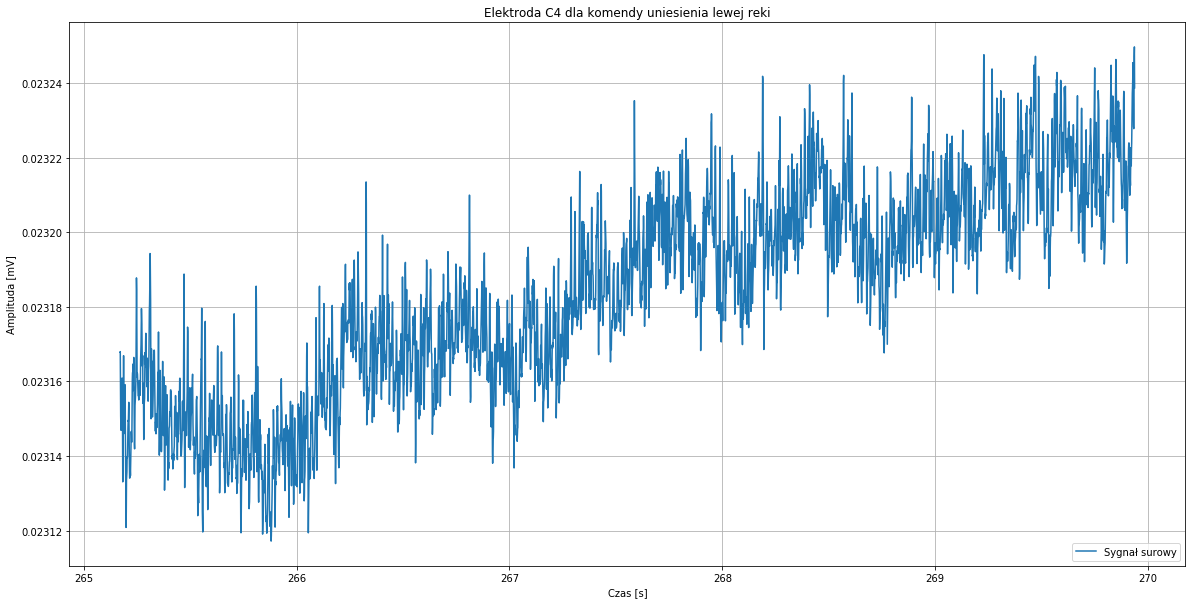

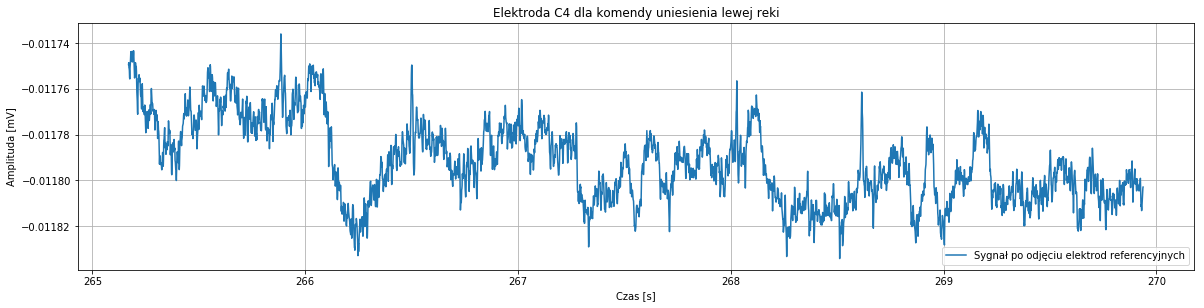

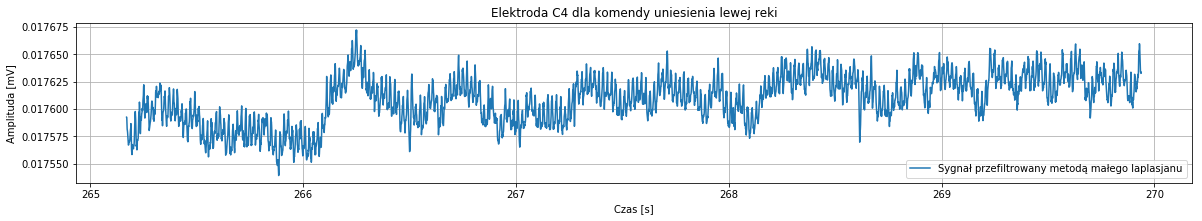

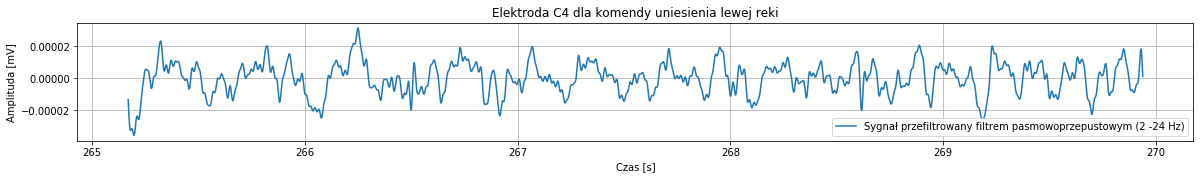

In [46]:
elctr = 49 #elektroda C4
plots = {'Sygnał surowy': VS_left_dataset[10][10][elctr], 
         'Sygnał po odjęciu elektrod referencyjnych': VS_filtered_signal_left[10][10][1],
         'Sygnał przefiltrowany metodą małego laplasjanu': VS_new_filtered_signal_left[10][10][1],
         'Sygnał przefiltrowany filtrem pasmowoprzepustowym (2 -24 Hz)': VS_final_filtered_signal_left[10][10][1]}


for num, plot in enumerate(plots.keys(), 1):
    plt.rcParams["figure.figsize"] = (20,10)
    plt.subplot(num,1,1)
    plt.plot(VS_left_timeset[10][10], plots[plot], label = plot)
    plt.legend(loc="lower right")
    plt.title("Elektroda C4 dla komendy uniesienia lewej reki")
    plt.ylabel('Amplituda [mV]')
    plt.xlabel('Czas [s]')
    plt.grid()    
    plt.show()